In [1]:

library(cubature)
library(MASS)
library(pracma)
library(mvtnorm)

library(LogConcDEAD)
library(logcondens) 

library(plot3D)

library(mclust)


Warning message:
“no DISPLAY variable so Tk is not available”
Package 'mclust' version 6.0.1
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:mvtnorm’:

    dmvnorm




In [24]:
source('lcic.r')

# First and second figures: demonstrate on 2D densities, Gaussian and Gamma
Fix $r = 0.5$

## Gaussian
We use $\Sigma_Z = \mathrm{Diag}(6,3)$, and $W$ randomly chosen.

In [6]:

d = 2
n = 1000
true_mean_vec <- rep(0,d) 
Sigma_max = 6
eigensep = 3

SimData <- get_heteroskedastic_gaussian_data(d, n, true_mean_vec, Sigma_max=Sigma_max, eigensep=eigensep)


[1] "Diagonal covariance: "
     [,1] [,2]
[1,]    6    0
[2,]    0    3


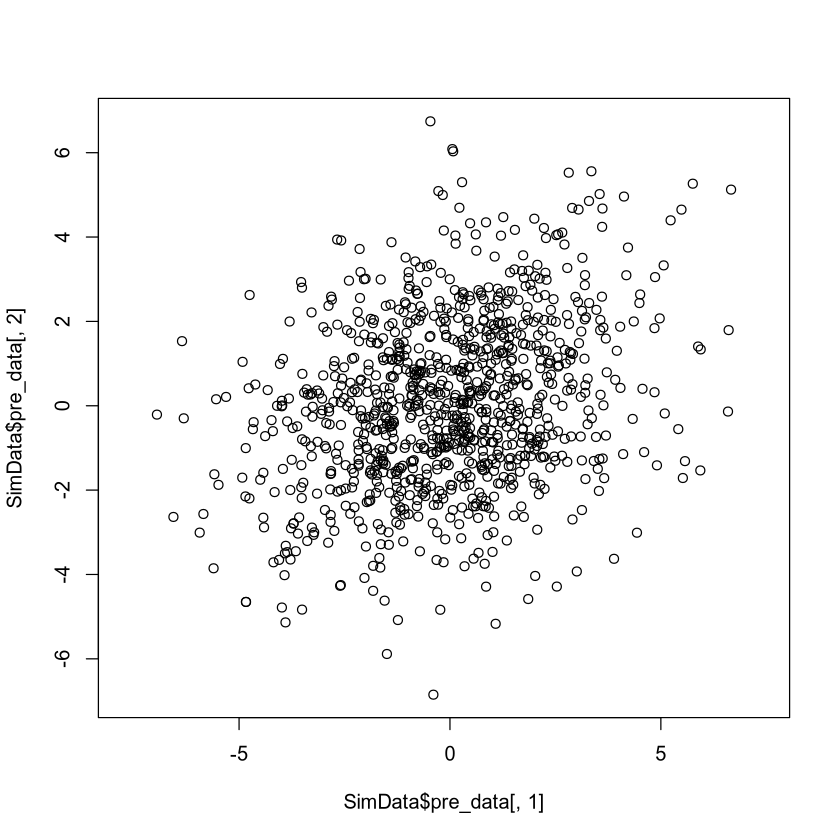

In [7]:
plot(x=SimData$pre_data[,1], y=SimData$pre_data[,2], asp=1)

In [8]:
# Fulldim
my_fulldim_output <- generate_fulldim_log_concave_estimator(SimData)


In [10]:
my_fulldim_output$optflag

[1] 0

In [11]:
split_r <- 0.5
my_estimator_logcondens <- generate_estimator_with_logcondens(SimData, r=split_r, plotting=FALSE)

[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2


In [12]:
# Helper functions for computing sq hellinger errors

hfun_logcondens <- function(X_samps){
    density_ratio <- evaluate_logcondens_estimator_vectorized(X_samps, my_estimator_logcondens)/heteroskedastic_gaussian_pdf_vectorized(X_samps, SimData)
    return(0.5*(sqrt(density_ratio)-1)^2)
}


hfun_fulldim <- function(X_samps){
    density_ratio <- evaluate_fulldim_estimator_vectorized(X_samps, my_fulldim_output$my_fulldim_estimator)/heteroskedastic_gaussian_pdf_vectorized(X_samps, SimData)
    return(0.5*(sqrt(density_ratio)-1)^2)
}

generate_heteroskedastic_gaussian_samples_for_monte_carlo <- function(K_samps){
    return(mvrnorm(K_samps, mu=rep_len(0,d), Sigma=SimData$covariance_X))
}

# Error of proposed
K_samps <- 10000
num_repeats <- 100

hellinger_error_estimate_statistics_logcondens <- naive_monte_carlo_integrate_repeated(hfun_logcondens, 
                                                    generate_heteroskedastic_gaussian_samples_for_monte_carlo, K_samps, num_repeats)


hellinger_error_estimate_statistics_fulldim <- naive_monte_carlo_integrate_repeated(hfun_fulldim, 
                                                generate_heteroskedastic_gaussian_samples_for_monte_carlo, K_samps, num_repeats)


In [15]:
print(hellinger_error_estimate_statistics_logcondens$mean_val)
print(hellinger_error_estimate_statistics_logcondens$sd_val)

[1] 0.007116562
[1] 0.0004835415


In [17]:
print(hellinger_error_estimate_statistics_fulldim$mean_val)
print(hellinger_error_estimate_statistics_fulldim$sd_val)

[1] 0.008182974
[1] 0.0005460509


In [27]:
# pdf(file='Results/First-figures/indep_dir_plot.pdf', width=4, height=4)
pdf(file='Results/First-figures/indep_dir_plot.pdf')
visualize_independent_directions(SimData, my_estimator_logcondens, xlim=c(-1,1), ylim=c(-1,1))
dev.off()

Comp.1,0.99832404,0.05787145
Comp.2,-0.05787145,0.99832404


png 
  2

In [28]:
# Plotting densities
xg <- seq(-7, 7, by=.2)
yg <- xg

gridmat <- data.matrix(expand.grid(xg, yg))


In [29]:
z_vals_gt <- matrix(heteroskedastic_gaussian_pdf_vectorized(gridmat, SimData), nrow=length(xg))

z_vals_fulldim <- matrix(evaluate_fulldim_estimator_vectorized(gridmat, my_fulldim_output$my_fulldim_estimator), nrow=length(xg))

z_vals_lcic <- matrix(evaluate_logcondens_estimator_vectorized(gridmat, my_estimator_logcondens), nrow=length(xg))


In [72]:
# dev.new(width=7, height=4, unit="in")
theta <- 10
phi <- 20
# pdf(file='Results/First-figures/compare-visually-gaussian.pdf', width=14, height=10)
options(repr.plot.width = 14, repr.plot.height = 10)
par(mfrow = c(2, 3))
persp(xg, yg, z_vals_gt, theta=theta, phi=phi, box=FALSE)
persp(xg, yg, z_vals_fulldim, theta=theta, phi=phi, box=FALSE)
persp(xg, yg, z_vals_lcic, theta=theta, phi=phi, box=FALSE)

contour(xg, yg, z_vals_gt, xlab=expression(x[1]), ylab=expression(x[2]), cex.lab=1.5, cex.axis=1.5, drawlabels=FALSE)
contour(xg, yg, z_vals_fulldim, xlab=expression(x[1]), ylab=expression(x[2]), cex.lab=1.5, cex.axis=1.5, drawlabels=FALSE)
contour(xg, yg, z_vals_lcic, xlab=expression(x[1]), ylab=expression(x[2]), cex.lab=1.5, cex.axis=1.5, drawlabels=FALSE)
# dev.off()

png 
  2

## Gamma
We use $W = I$ with $Z_1 \sim \mathrm{Gamma}(6, 1)$ and $Z_1 \sim \mathrm{Gamma}(3, 1)$.

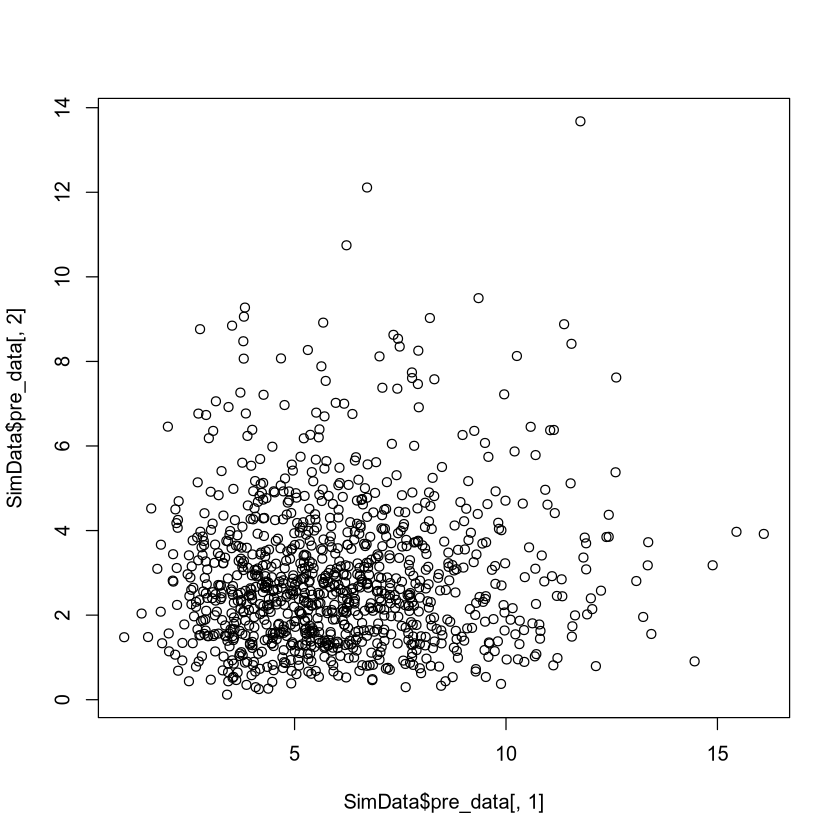

In [78]:

d = 2
n = 1000
# true_mean_vec <- rep(0,d) 
Sigma_max = 6
eigensep = 3

SimData <- get_axis_aligned_heteroskedastic_gamma_data(d, n, Sigma_max=Sigma_max, eigensep=eigensep)
options(repr.plot.width = 7, repr.plot.height = 7)
plot(x=SimData$pre_data[,1], y=SimData$pre_data[,2], asp=1)

In [80]:
# Fulldim
my_fulldim_output <- generate_fulldim_log_concave_estimator(SimData)
my_fulldim_output$optflag

[1] 0

In [81]:
split_r <- 0.5
my_estimator_logcondens <- generate_estimator_with_logcondens(SimData, r=split_r, plotting=FALSE)

[1] "PCA done!"
[1] "Marginal: "
[1] 1
[1] "Marginal: "
[1] 2


In [83]:
# Assess error
hfun_logcondens <- function(X_samps){
    density_ratio <- evaluate_logcondens_estimator_vectorized(X_samps, my_estimator_logcondens)/axis_aligned_heteroskedastic_gamma_pdf_vectorized(X_samps, SimData)
    return(0.5*(sqrt(density_ratio)-1)^2)
}

hfun_fulldim <- function(X_samps){
    density_ratio <- evaluate_fulldim_estimator_vectorized(X_samps, my_fulldim_output$my_fulldim_estimator)/axis_aligned_heteroskedastic_gamma_pdf_vectorized(X_samps, SimData)
    return(0.5*(sqrt(density_ratio)-1)^2)
}

generate_heteroskedastic_gamma_samples_for_monte_carlo <- function(K_samps){
    opt_data = matrix(0, nrow=K_samps, ncol=d)
    for (dind in 1:d) {
        opt_data[,dind] <- rgamma(K_samps, shape=SimData$covariance_Z[dind,dind])
    }
    return(opt_data)
}

K_samps <- 10000
num_repeats_mc <- 100

hellinger_error_estimate_statistics_logcondens <- naive_monte_carlo_integrate_repeated(hfun_logcondens, 
                                                    generate_heteroskedastic_gamma_samples_for_monte_carlo, K_samps, num_repeats_mc)

hellinger_error_estimate_statistics_fulldim <- naive_monte_carlo_integrate_repeated(hfun_fulldim, 
                                                    generate_heteroskedastic_gamma_samples_for_monte_carlo, K_samps, num_repeats_mc)



In [84]:
print(hellinger_error_estimate_statistics_logcondens$mean_val)
print(hellinger_error_estimate_statistics_logcondens$sd_val)

[1] 0.01184326
[1] 0.0020044


In [85]:
print(hellinger_error_estimate_statistics_fulldim$mean_val)
print(hellinger_error_estimate_statistics_fulldim$sd_val)

[1] 0.008470193
[1] 0.0005310059


6,0
0,3


In [92]:
# Plotting densities
xg <- seq(-1, 14, by=.2)
yg <- seq(-1, 12, by=.2)

gridmat <- data.matrix(expand.grid(xg, yg))


In [93]:
z_vals_gt <- matrix(axis_aligned_heteroskedastic_gamma_pdf_vectorized(gridmat, SimData), nrow=length(xg))

z_vals_fulldim <- matrix(evaluate_fulldim_estimator_vectorized(gridmat, my_fulldim_output$my_fulldim_estimator), nrow=length(xg))

z_vals_lcic <- matrix(evaluate_logcondens_estimator_vectorized(gridmat, my_estimator_logcondens), nrow=length(xg))


In [98]:
# dev.new(width=7, height=4, unit="in")
theta <- 130
phi <- 20
# pdf(file='Results/First-figures/compare-visually-gamma.pdf', width=14, height=10)
options(repr.plot.width = 14, repr.plot.height = 10)
par(mfrow = c(2, 3))
persp(xg, yg, z_vals_gt, theta=theta, phi=phi, box=FALSE)
persp(xg, yg, z_vals_fulldim, theta=theta, phi=phi, box=FALSE)
persp(xg, yg, z_vals_lcic, theta=theta, phi=phi, box=FALSE)

contour(xg, yg, z_vals_gt, xlab=expression(x[1]), ylab=expression(x[2]), cex.lab=1.5, cex.axis=1.5, drawlabels=FALSE)
contour(xg, yg, z_vals_fulldim, xlab=expression(x[1]), ylab=expression(x[2]), cex.lab=1.5, cex.axis=1.5, drawlabels=FALSE)
contour(xg, yg, z_vals_lcic, xlab=expression(x[1]), ylab=expression(x[2]), cex.lab=1.5, cex.axis=1.5, drawlabels=FALSE)
# dev.off()

png 
  2

In [43]:
?par

par {graphics},R Documentation
...,"arguments in tag = value form, a single list of tagged values, or character vectors of parameter names. Supported parameters are described in the ‘Graphical Parameters’ section."
no.readonly,"logical; if TRUE and there are no other arguments, only parameters are returned which can be set by a subsequent par() call on the same device."
